# Predicting Breast Cancer
The [dataset]('http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Original%29') below is a record of benign and malignant cancer patients from Wisconsin between the years of 1989 through 1991. This dataset is provided by the Wisconsin Breast Cancer Database.

The purpose of this exercise is to predict the binary target variable of breast cancer given the other features. Moreover, we will also find which traits are the most indicative of whether or not an individual will be diagnosed.

   ### Dataset Information
   -- -----------------------------------------
1. Sample code number (continuous)
2. Clump Thickness (1 - 10)
3. Uniformity of Cell Size (1 - 10)
4. Uniformity of Cell Shape (1 - 10)
5. Marginal Adhesion (1 - 10)
6. Single Epithelial Cell Size (1 - 10)
7. Bare Nuclei (1 - 10)
8. Bland Chromatin (1 - 10)
9. Normal Nucleoli (1 - 10)
10. Mitoses (1 - 10)
11. Class (0 for benign, 1 for malignant)

In [12]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, recall_score

In [2]:
column_names = ['id','clump_thickness','cell_size_uniformity','cell_size_shape','marg_adhesion',
                'single_epithelial_cell_size','bare_nuclei','bland_chromatin','normal_nuceoli','mitoses','target']
df = pd.read_csv('breast-cancer-wisconsin.data',header=None, names=column_names)

# Changing target to binary: 0 for benign, 1 for malignant
df['target'] = np.where(df.target == 4, 1, 0) 
df.head()

,id,clump_thickness,cell_size_uniformity,cell_size_shape,marg_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nuceoli,mitoses,target
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0


## Preliminary Analysis

In [3]:
df.shape

(699, 11)

In [4]:
def snapshot(data):
    '''Creates a DataFrame that gives snapshot of original dataset for preliminary cleaning and analysis.'''
    preliminary_details = pd.DataFrame()
    preliminary_details['Type'] = data.dtypes
    preliminary_details['Unique'] = data.nunique()
    preliminary_details['NaN'] = data.isnull().sum()
    preliminary_details['Sample'] = data.sample().T
    return preliminary_details
snapshot(df)

,Type,Unique,NaN,Sample
id,int64,645,0,145447
clump_thickness,int64,10,0,8
cell_size_uniformity,int64,10,0,4
cell_size_shape,int64,10,0,4
marg_adhesion,int64,10,0,1
single_epithelial_cell_size,int64,10,0,2
bare_nuclei,object,11,0,9
bland_chromatin,int64,10,0,3
normal_nuceoli,int64,10,0,3
mitoses,int64,9,0,1


In [5]:
df.bare_nuclei.unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [6]:
# 16 of the 699 entries do not have bare_nuclei information
df[df.bare_nuclei == '?'].shape

(16, 11)

In [7]:
foo = df.bare_nuclei[df.bare_nuclei != '?']
foo = foo.astype('int64')
foo.value_counts()

1     402
10    132
5      30
2      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: bare_nuclei, dtype: int64

In [8]:
# Replacing missing 'bare_nuclei' values with the most common value (that also happens to be the median)
# and converting the column from type 'object' to type 'int64'
df['bare_nuclei'] = (df.bare_nuclei.replace('?',foo.median())).astype('int64')

Percentage of Malignant:  0.3447782546494993
Percentage of Benign: 0.6552217453505007


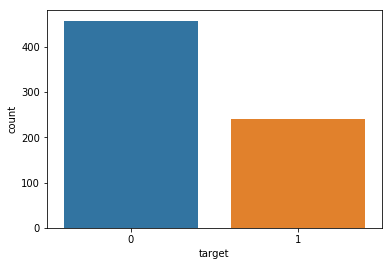

In [9]:
sns.countplot(df.target)
print('Percentage of Malignant: ', df[df.target == 1].shape[0] / len(df))
print('Percentage of Benign:', df[df.target == 0].shape[0] / len(df))

While the dataset is biased in terms of its target variable, it does not appear to be overly so. We should be able to move forward with modeling; however, we will keep this imbalance in mind as we progress.

## Modeling

In [13]:
X = df.drop(['id','target'], 1)
y = df.target

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3)

In [15]:
logistic = LogisticRegression(C=1, penalty= 'l1')
logistic.fit(X_train, y_train)

y_pred = logistic.predict(X_test)  

print(recall_score(y_test,y_pred))
confusion_matrix(y_test, y_pred)

0.9705882352941176


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[140,   2],
       [  2,  66]], dtype=int64)

With some parameter adjustments of "C" in the Logistic Regression model, the model performed incredibly well with a fairly even split between false positives and false negatives. While we are limited to a smaller dataset, let us do the same model with cross-validation.

In [18]:
scores = cross_val_score(logistic, X, y, cv=5)
print(scores)
print(scores.mean())
print(scores.std())

[0.91489362 0.94285714 0.98571429 0.98561151 0.98561151]
0.9629376134350878
0.029183690420514545


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

## Understanding the Features

In [34]:
# The estimated coefficients will all be around 1:
coefficients = pd.DataFrame()
coefficients['features'] = X.columns
coefficients['coefficients'] = logistic.coef_[0]
coefficients

,features,coefficients
0,clump_thickness,0.457273
1,cell_size_uniformity,0.000000
2,cell_size_shape,0.207022
3,marg_adhesion,0.192654
4,single_epithelial_cell_size,0.077680
5,bare_nuclei,0.429628
6,bland_chromatin,0.223086
7,normal_nuceoli,0.207839
8,mitoses,0.452432


With similar importance, the three most important features are clump_thickness, mitoses, and bare_nuclei. Interestingly, the cell_size_uniformity provides no insight, causing its coefficient to take the feature out of the equation entirely.

## Conclusion

If the dataset were larger, it would be beneficial to increase the recall score (TP / TP+FN) in order to ensure that no patient with cancer is accidentally missed. However, since the dataset is relatively small, we run the risk of overfitting this dataset at the expense of the other patients. That being said, in the train-test split above, out of the 68 cancer patients only 2 were missed which gives us a 97.05% recall score. For the purposes of this assignment, this is certainly a commendable model.